In [3]:
# Import Librares

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read data
df = pd.read_csv(r'D:\Download\archive\movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#Check data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Convert data type of column for readability

df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [10]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0


In [21]:
#Create correct Year Column
import re
df['yearcorrect'] = df['released'].astype(str).str.split().str[2:3]
#df['yearcorrect'] = re.findall(r",(\d+)", df['released'].astype(str))
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,[1980]
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,[1980]
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,[1980]
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,[1980]
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,[1980]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0,[2020]
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0,[2020]
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN,[2020]
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0,[2020]


In [22]:
df.sort_values(by=['gross'],inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,[2009]
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,[2019]
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,[1997]
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,[2015]
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,[2018]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0,[2020]
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0,[2020]
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN,[2020]
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0,[2020]


In [45]:
#df.fillna(0)
#df["rating"].str.replace('','Not_available')
#df["rating"].str.replace('[^a-zA-Z0-9]','',regex=True)
#df["rating"].apply(lambda x: str(x))

#df["rating"] = df["rating"].replace(np.nan, '')
df[['budget', 'gross']] = df[['budget', 'gross']].fillna(0)

In [47]:
#Drop duplicates

df['name'].drop_duplicates()

0                                          The Shining
1                                      The Blue Lagoon
2       Star Wars: Episode V - The Empire Strikes Back
3                                            Airplane!
4                                           Caddyshack
                             ...                      
7663                                      More to Life
7664                                       Dream Round
7665                                     Saving Mbango
7666                                      It's Just Us
7667                                         Tee em el
Name: name, Length: 7512, dtype: object

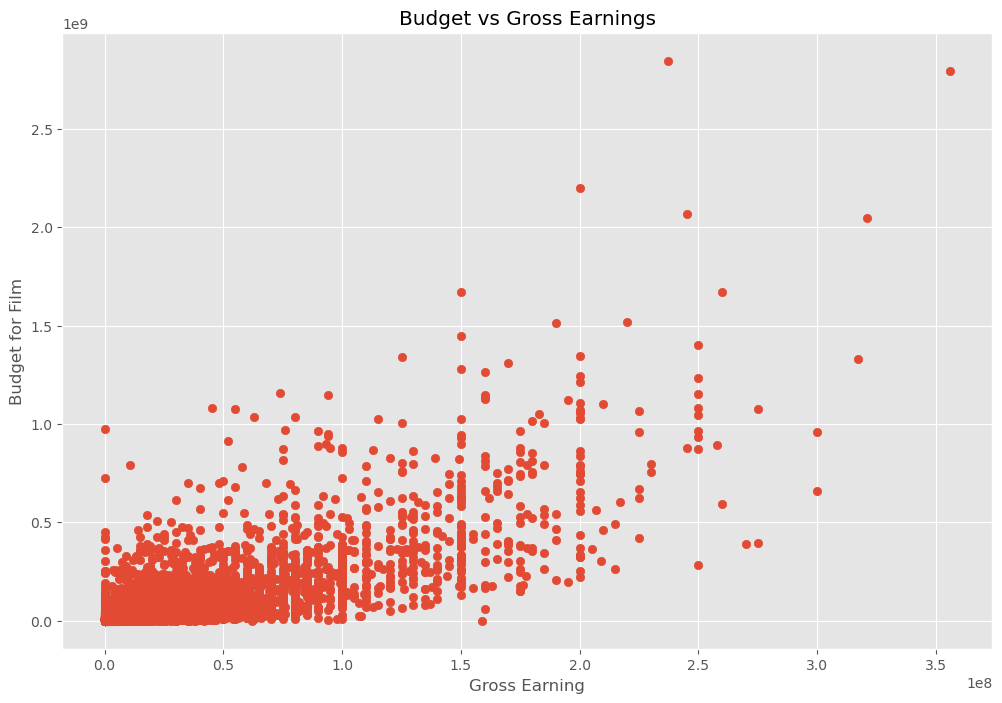

In [49]:
#Scatter plot of budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

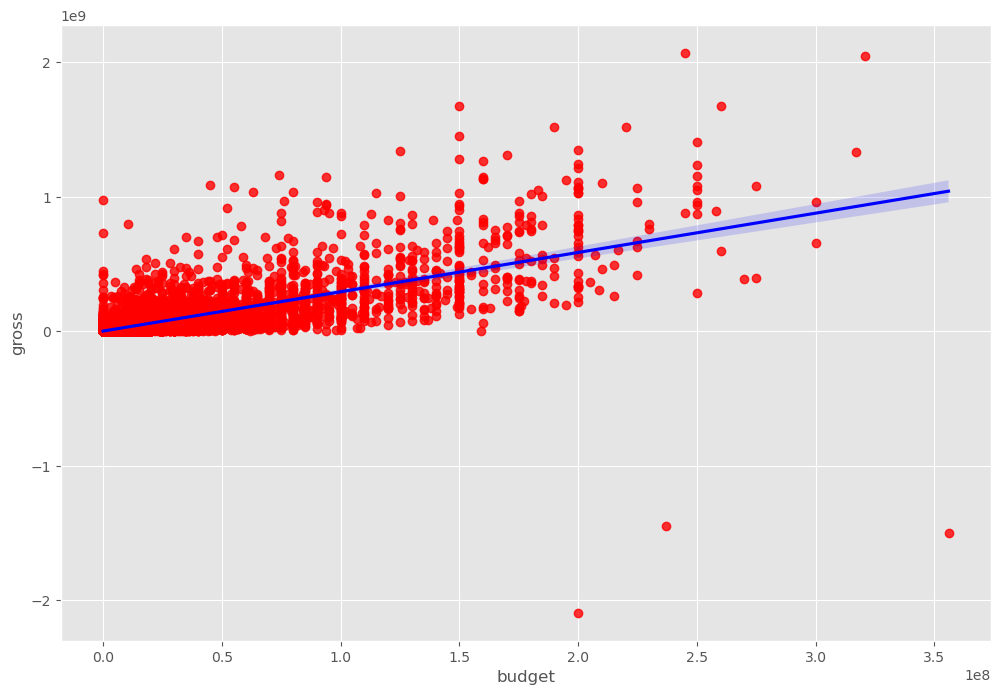

In [59]:
#Plot budget vs gross using seaborn
#df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
#df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color": "red"},line_kws={"color":"blue"})

In [62]:
#Finding correlation from data
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261092,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.173680,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.588068,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.704237,0.269510
gross,0.261092,0.173680,0.588068,0.704237,1.000000,0.210915
runtime,0.120811,0.399451,0.309212,0.269510,0.210915,1.000000


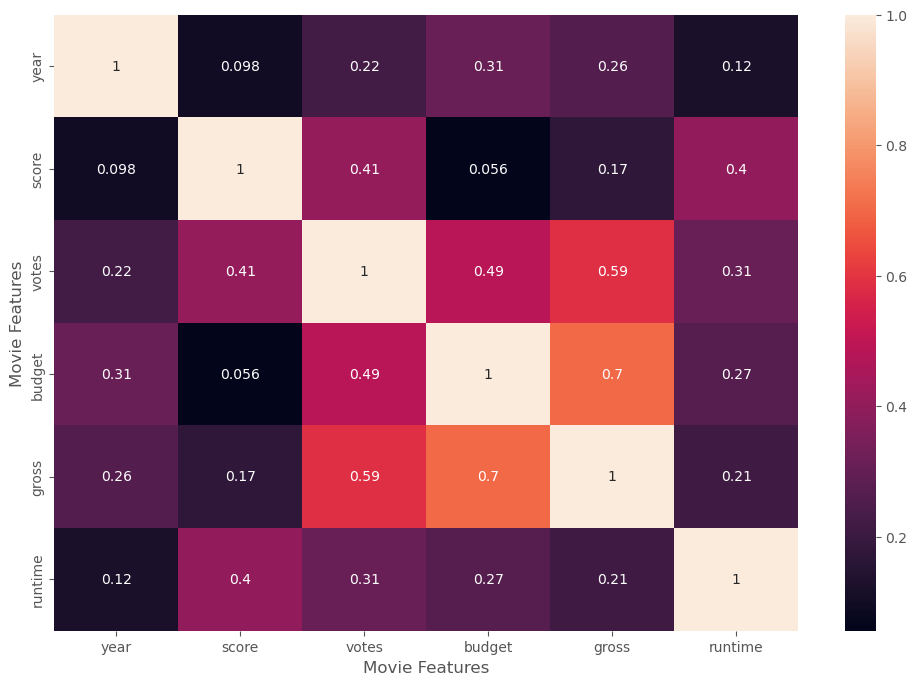

In [64]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

TypeError: unhashable type: 'list'

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,[1980]
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,[1980]
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,[1980]
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,[1980]
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,[1980]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2965,3.1,18.0,1500,2290,2422,56,7000,0,0,90.0,[2020]
7664,1678,0,4,2020,1108,4.7,36.0,774,2615,1887,56,0,0,540,90.0,[2020]
7665,4717,0,6,2020,194,5.7,29.0,2061,2684,2041,56,58750,0,942,NaN,[2020]
7666,2843,0,6,2020,2818,NaN,NaN,1184,1825,451,56,15000,0,0,120.0,[2020]
